In [1]:
import numpy as n
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

C:\Users\pc\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pc\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pc\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
ds = pd.read_csv('mall_customers.csv')

In [3]:
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
ds.shape

(200, 5)

In [5]:
ds.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
x = ds.iloc[:,[3,4]].values

# Choosing the number of cluster


By WCSS -> Within clusters sum of the square

In [10]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

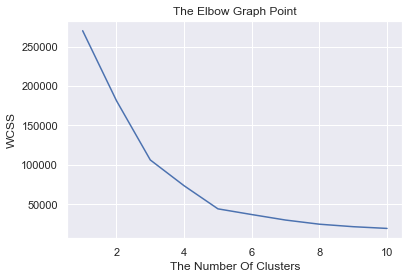

In [11]:
# to create an elbow graph to see the least wcss value
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Graph Point")
plt.xlabel("The Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

from above graph we choose K =5 after which there is no significant drop in the value 

# Training K-means Clustering Model

In [13]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=0)

# return a label from each data point based on their clusters

y = kmeans.fit_predict(x)

In [14]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Visualizing all the clusters

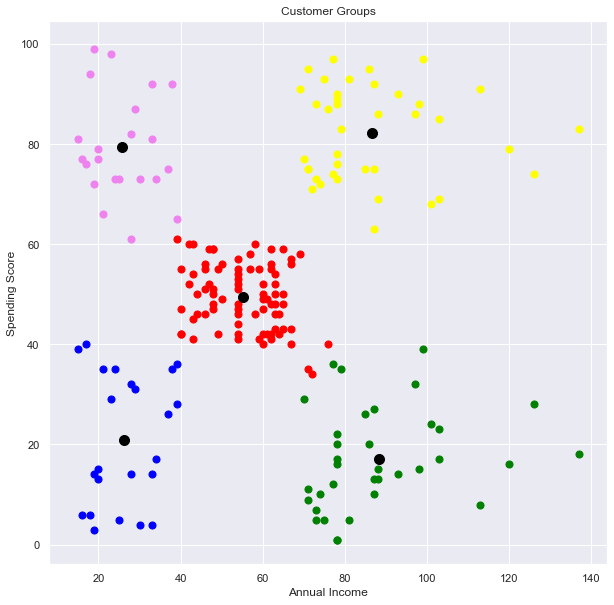

In [15]:
# plotting all clusters and their centroid
plt.figure(figsize=(10,10))
# here x[y== cluster no.,1 col of x] in x axis and x[y==cluster no.,2 column of x] in y axis , s = size of dots

plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue',label='Cluster 5')

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s =100,c='black',label='Centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()
